# Thiết kế 3: Sử dụng Composition

Đây là 1 trong 3 phần của bài thực hành về những phong cách viết code khác nhau trong Python, phần này minh họa về cách thiết kế OOP sử dụng toàn Composition; 2 phần kia trình bày về cách tiếp cận chỉ dùng hàm, và OOP Inheritance có thể tải tại đây:

https://github.com/kinokoberuji/Python-snipets/tree/master/GOF/Designs

# Mục tiêu

Nhắc lại về tình huống hiện thời: Chúng ta có 3 file pickles chứa dữ liệu thô của xét nghiệm đa ký hô hấp (PG) (BN_C_Polygraph.pkl), một cảm biến hô hấp mới dùng công nghệ Accelerometer (BN_C_Sensor.pkl), và danh sách các biến cố ngưng/giảm thở khi ngủ (BN_C_Scoring.pkl) của bệnh nhân C.

Mục tiêu là viết 1 chương trình cho phép hiển thị các tín hiệu PG và Acc cho một biến cố hô hấp tùy chọn trong danh sách, với yêu cầu:

1) Nếu là tín hiệu PG, hiển thị 3 kênh RIP thorax, Abdominal và lưu lượng thông khí qua mũi (flux th).

2) Nếu là tín hiệu Acc, cần xác định thêm giới hạn trên và dưới của biên độ dao động 3 kênh X,Y,Z của cảm biến.

# Sơ đồ UML

Phần này, Nhi code theo nguyên tắc OOP, và chỉ dùng thiết kế Composition. Sơ đồ UML là như sau:

<img src="files/composition_uml.png">

Nội dung chi tiết của code nằm trong module Composition.py :
https://github.com/kinokoberuji/Python-snipets/blob/master/GOF/Designs/Composition.py


Ta sử dụng module này như sau:

In [1]:
from Composition import *

Như các bạn thấy trong sơ đồ UML, Signal_viz là class quan trọng nhất, cho phép vẽ các biểu đồ ta cần; tuy nhiên nó cần những nguyên liệu như : Tín hiệu (Raw_signal), danh sách biến cố (Event_lst), phân đoạn (Sample), và cho dữ liệu Acc, ta cần thêm thông tin về biên độ dao động (Envelop). Mỗi bộ phận này tương ứng với object của những class như Event_lst, Raw_signal, Envelop, Sample.

Quan hệ "Class A bao gồm/chứa đựng những classes B,C,D... này gọi là Composition

Khi sử dụng thiết kế Composition, ta cần tạo ra lần lượt tất cả object cần thiết cho công việc,trước khi đưa chúng vào class Signal_viz

Thí dụ cho trường hợp của tín hiệu PG:

In [8]:
pg_sig = Raw_signal('BN_C_Polygraph.pkl')
acc_sig = Raw_signal('BN_C_Sensor.pkl')
events = Evt_lst('BN_C_Scoring.pkl')
envelop = Envelop(pg_sig)
sample = Sample(idx = 53, _evt_lst = events)

In [9]:
pg_viz = Signal_viz(_sig_df = pg_sig,
                    _evt_lst = events,
                    _envelop = envelop,
                    _sample = sample,
                    idx = 53
                   )

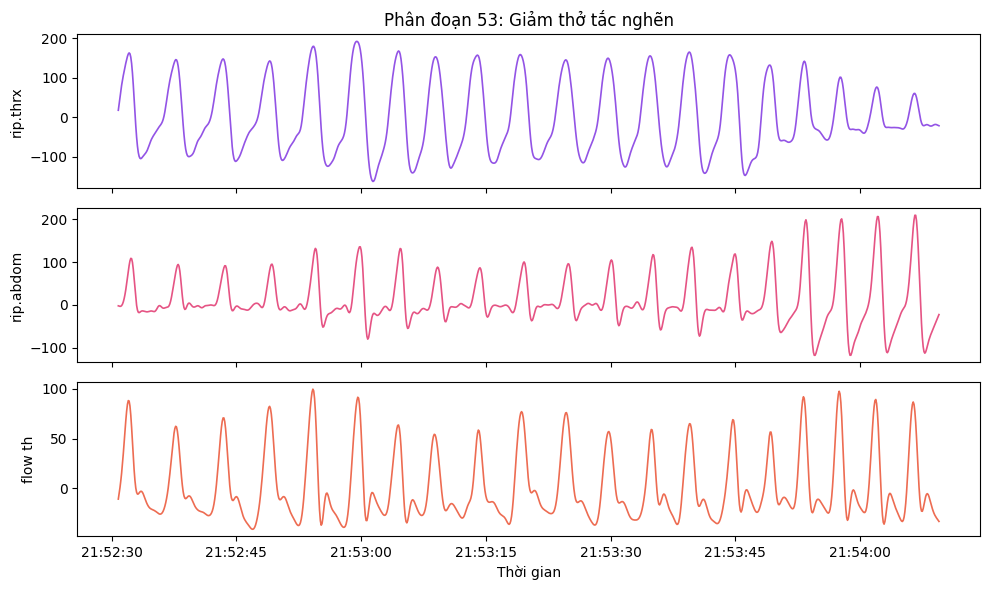

In [10]:
pg_viz.visualize(mode = 'PG')

Còn đây là minh họa cho trường hợp tín hiệu Accelerometer:

In [11]:
acc_viz = Signal_viz(_sig_df = acc_sig,
                    _evt_lst = events,
                    _envelop = envelop,
                    _sample = sample,
                    idx = 53
                   )

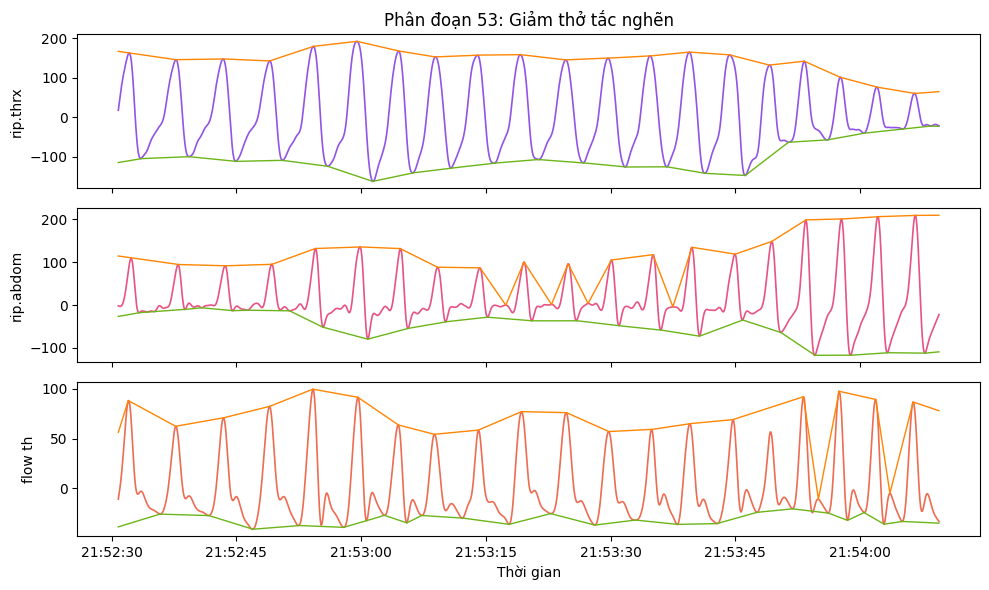

In [12]:
pg_viz.visualize(mode = 'Acc')